In [1]:
from parameterized.proposal_inverter import Wallet, ProposalInverter

import numpy as np
import plotly.express as px

rng = np.random.default_rng(42)

In [2]:
# Deploy 10 wallets & add random values to funds & wallet feature matrix entries
WALLETS = dict()
number_of_wallets = 5
total_funds = 1000

funds_distribution = rng.random(size=number_of_wallets)
funds_distribution = funds_distribution / np.sum(funds_distribution) * total_funds

for funds in funds_distribution:
    wallet = Wallet(funds=funds)
    no_features = wallet.number_of_features
    # fill in wallet feature matrix (5 features) with random values
    wallet.wallet_feature_matrix = list(rng.random(size=wallet.number_of_features))
    WALLETS[wallet.public] = wallet

In [3]:
"""Get the wallet matrix by appending every wallet_feature_matrix to a 2D array
every entry in the array is an array respective to each wallet's preference of a 
certain feature. It is a number within range (0-1), the closer the rating is to
 1, the higher the preference"""

wallet_matrix = []
for wallet in WALLETS.values():
    wallet_matrix.append(wallet.wallet_feature_matrix)
wallet_matrix = np.asmatrix(wallet_matrix)

"""The matrix is represented by the 2d array below, where the rows represent
wallets and the columns represent features"""

wallet_matrix

matrix([[0.97562235, 0.7611397 , 0.78606431, 0.12811363, 0.45038594],
        [0.37079802, 0.92676499, 0.64386512, 0.82276161, 0.4434142 ],
        [0.22723872, 0.55458479, 0.06381726, 0.82763117, 0.6316644 ],
        [0.75808774, 0.35452597, 0.97069802, 0.89312112, 0.7783835 ],
        [0.19463871, 0.466721  , 0.04380377, 0.15428949, 0.68304895]])

In [4]:
PROPOSALS = dict()
number_of_proposals = 8
owner_wallet = Wallet(funds=5000)
deploy_funds = owner_wallet.funds/number_of_proposals

for i in range(number_of_proposals):
    proposal = owner_wallet.deploy(deploy_funds)
    # fill in proposal feature matrix (5 features) with random values
    proposal.proposal_feature_matrix = list(rng.random(size=proposal.number_of_features))
    PROPOSALS[proposal.public] = proposal

In [5]:
"""Get the proposal matrix by appending every proposal_feature_matrix to a 2D array
every entry in the array is an array respective to the degree of presence of a 
certain feature in a proposal. It is a number within range (0-1), the closer the 
rating is to 1, the higher the preference"""

proposal_matrix = []
for proposal in PROPOSALS.values():
    proposal_matrix.append(proposal.proposal_feature_matrix)
proposal_matrix = np.asmatrix(proposal_matrix)
proposal_matrix = np.matrix.transpose(proposal_matrix)

"""The matrix is represented by the 2d array below, where the rows represent
features and the columns represent proposals. We collect the transpose of the
matrix in order to successfully multiply the wallet matrix by the proposal matrix"""

proposal_matrix

matrix([[0.74476216, 0.18947136, 0.43715192, 0.80476436, 0.1999082 ,
         0.78072903, 0.66840296, 0.5535794 ],
        [0.96750973, 0.12992151, 0.8326782 , 0.38747838, 0.00736227,
         0.45891578, 0.47109621, 0.55920716],
        [0.32582536, 0.47570493, 0.7002651 , 0.2883281 , 0.78692438,
         0.5687412 , 0.56523611, 0.3039501 ],
        [0.37045971, 0.22690935, 0.31236664, 0.6824955 , 0.66485086,
         0.139797  , 0.76499886, 0.03081783],
        [0.46955581, 0.66981399, 0.8322598 , 0.13975248, 0.70516538,
         0.11453007, 0.63471832, 0.43671739]])

In [6]:
"""The product of both matrices is a matrix where the entries represent
the likelihood for a wallet to fund a proposal. The higher the number
, the more likely a wallet will fund a proposal"""

wallet_proposal_matrix = np.matmul(wallet_matrix, proposal_matrix)
matrix_norm = np.linalg.norm(wallet_proposal_matrix)
#wallet_proposal_matrix
wallet_proposal_matrix = wallet_proposal_matrix/matrix_norm
wallet_proposal_matrix

matrix([[0.21784166, 0.10885269, 0.22307394, 0.16046685, 0.13457463,
         0.17923928, 0.20251044, 0.15476089],
        [0.2087591 , 0.10799687, 0.221435  , 0.16151911, 0.15938987,
         0.13730707, 0.21576574, 0.12535034],
        [0.14644853, 0.08329643, 0.15308338, 0.11775919, 0.12063503,
         0.07227254, 0.16335135, 0.08333206],
        [0.21147204, 0.15148005, 0.24593214, 0.19224641, 0.22694118,
         0.16746475, 0.26427266, 0.14100961],
        [0.10888089, 0.06727479, 0.12345982, 0.06066639, 0.07280096,
         0.05405712, 0.1020117 , 0.07544974]])

In [7]:
probability_fig = px.imshow(
    wallet_proposal_matrix,
    labels={"origin": [1,1], "x": "Proposal", "y": "Wallet", "color": "Probability"},
)
probability_fig.show()

## Visualisation - the high-level idea 


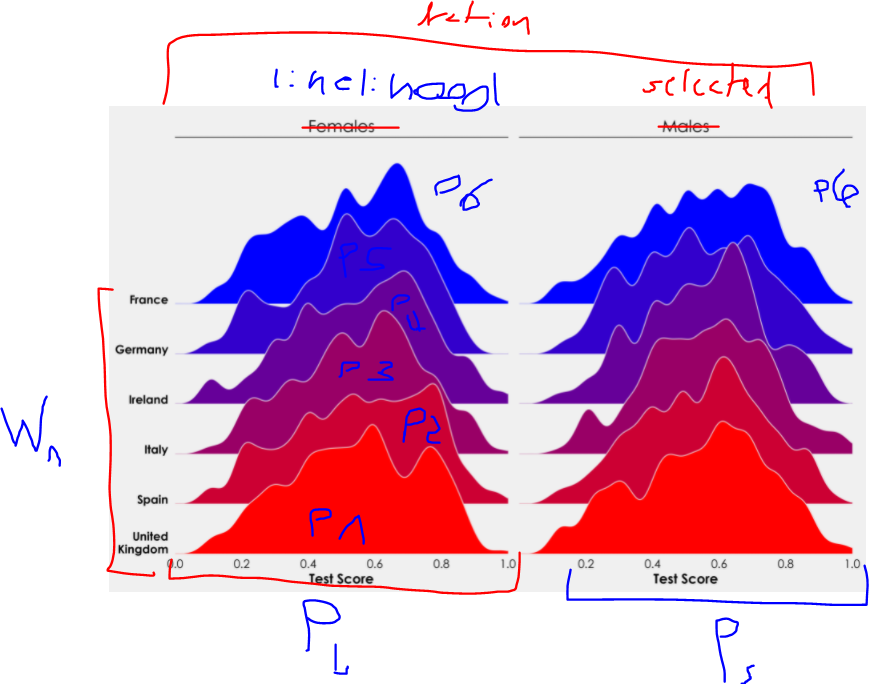

The KDE is run accross epoch values for each proposal of a given wallet for a given proposal. Depending where the majority of the area of the chart lands will indicated whether a higher probability of lower probability of a wallet funding an proposal. This can be compared to the actual action taken where the KDE value is drawn over 0 and 1 values representing whether an action for a proposal has been selected or not. 

High probability should result to large extend of the area leaning towards the right (or close to 1) of the chart & vice versa. Thsus the shape of the graph approximately being similar. This can provide a high-level control of whether the action correspond to what the likihood. 

#### Dimension to visulaise 
- wallet - int
- proposal - int 
- epoch - int 
- selected action - int --> represent as [0,1]  
- probabiliy - float between [0,1]

##### visualisation #1
- wallet 
- proposal 
- agg. prob over epoch - kde 

##### visualisation #2
- wallet 
- proposal 
- agg. action over epoch - kde 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rand
import matplotlib.pyplot as plt

### Visualising likelihoods of a given action 

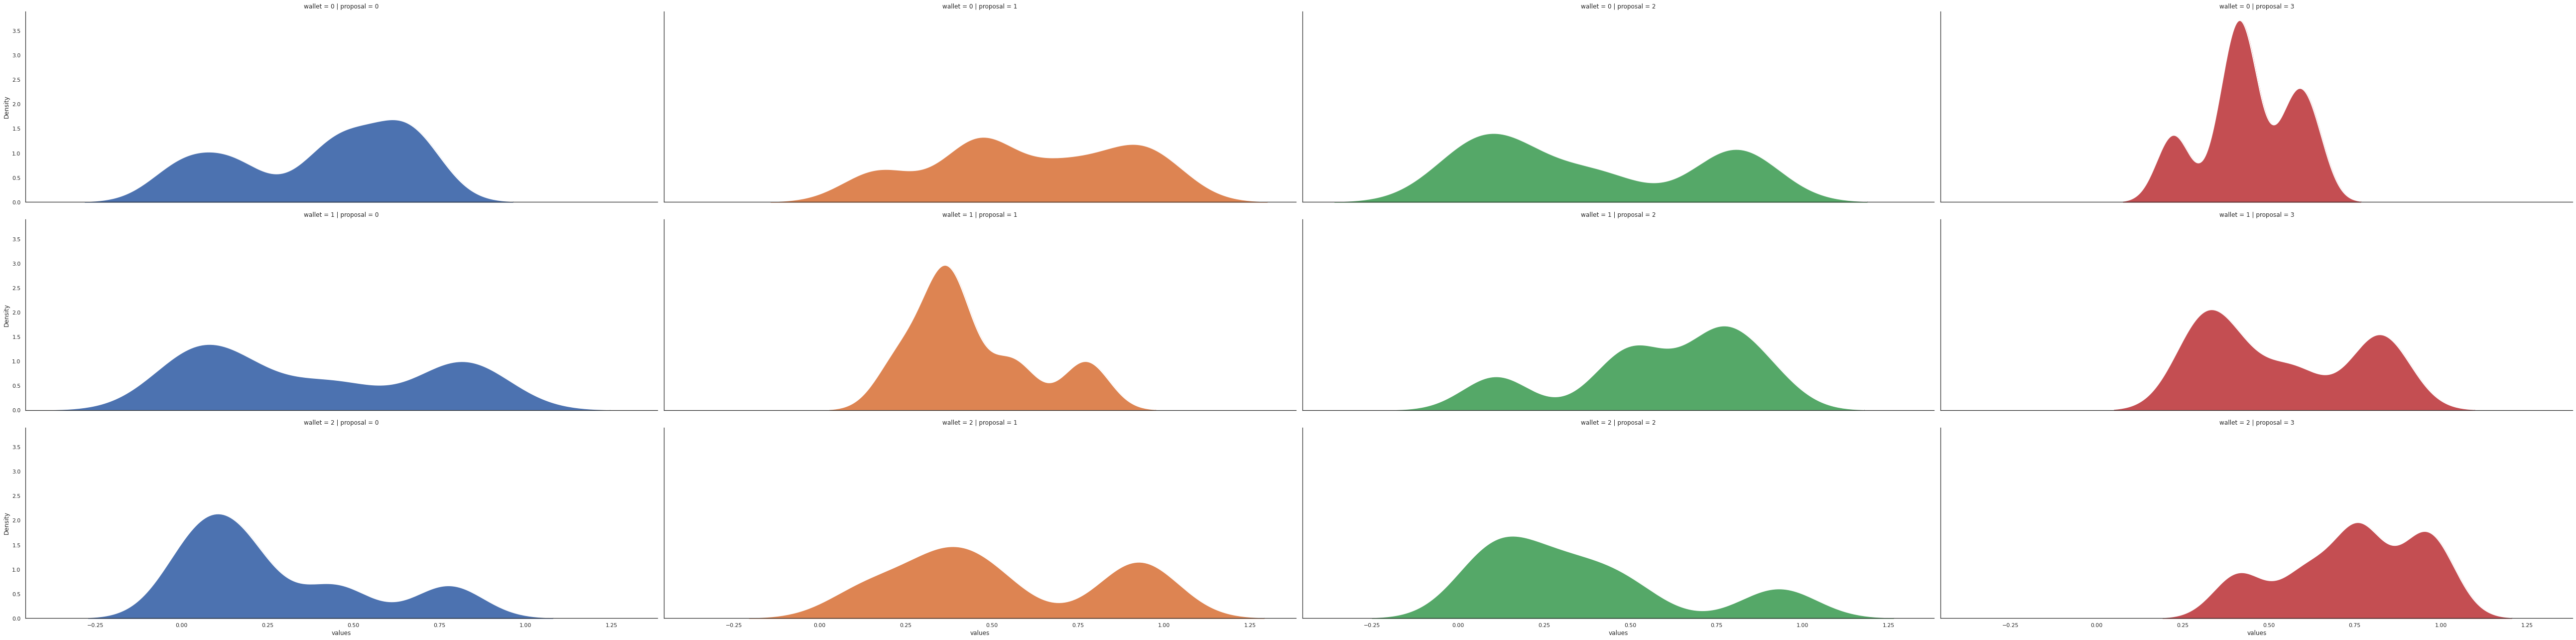

In [339]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Format the data
x = np.arange(t.shape[0])[:, None, None]
y = np.arange(t.shape[1])[None, :, None]
z = np.arange(t.shape[2])[None, None, :]
x, y, z = np.broadcast_arrays(x, y, z)

# Make df2 
df2 = pd.DataFrame(dict(values=t.ravel(),wallet=x.ravel(),proposal=y.ravel(),epoch=z.ravel()))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df2, col='proposal',row="wallet", hue='proposal', aspect=3, height=6) #, palette=pal)

# # Draw the densities 
g.map(sns.kdeplot, "values",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "values", clip_on=False, color="w", lw=2, bw_adjust=.5)



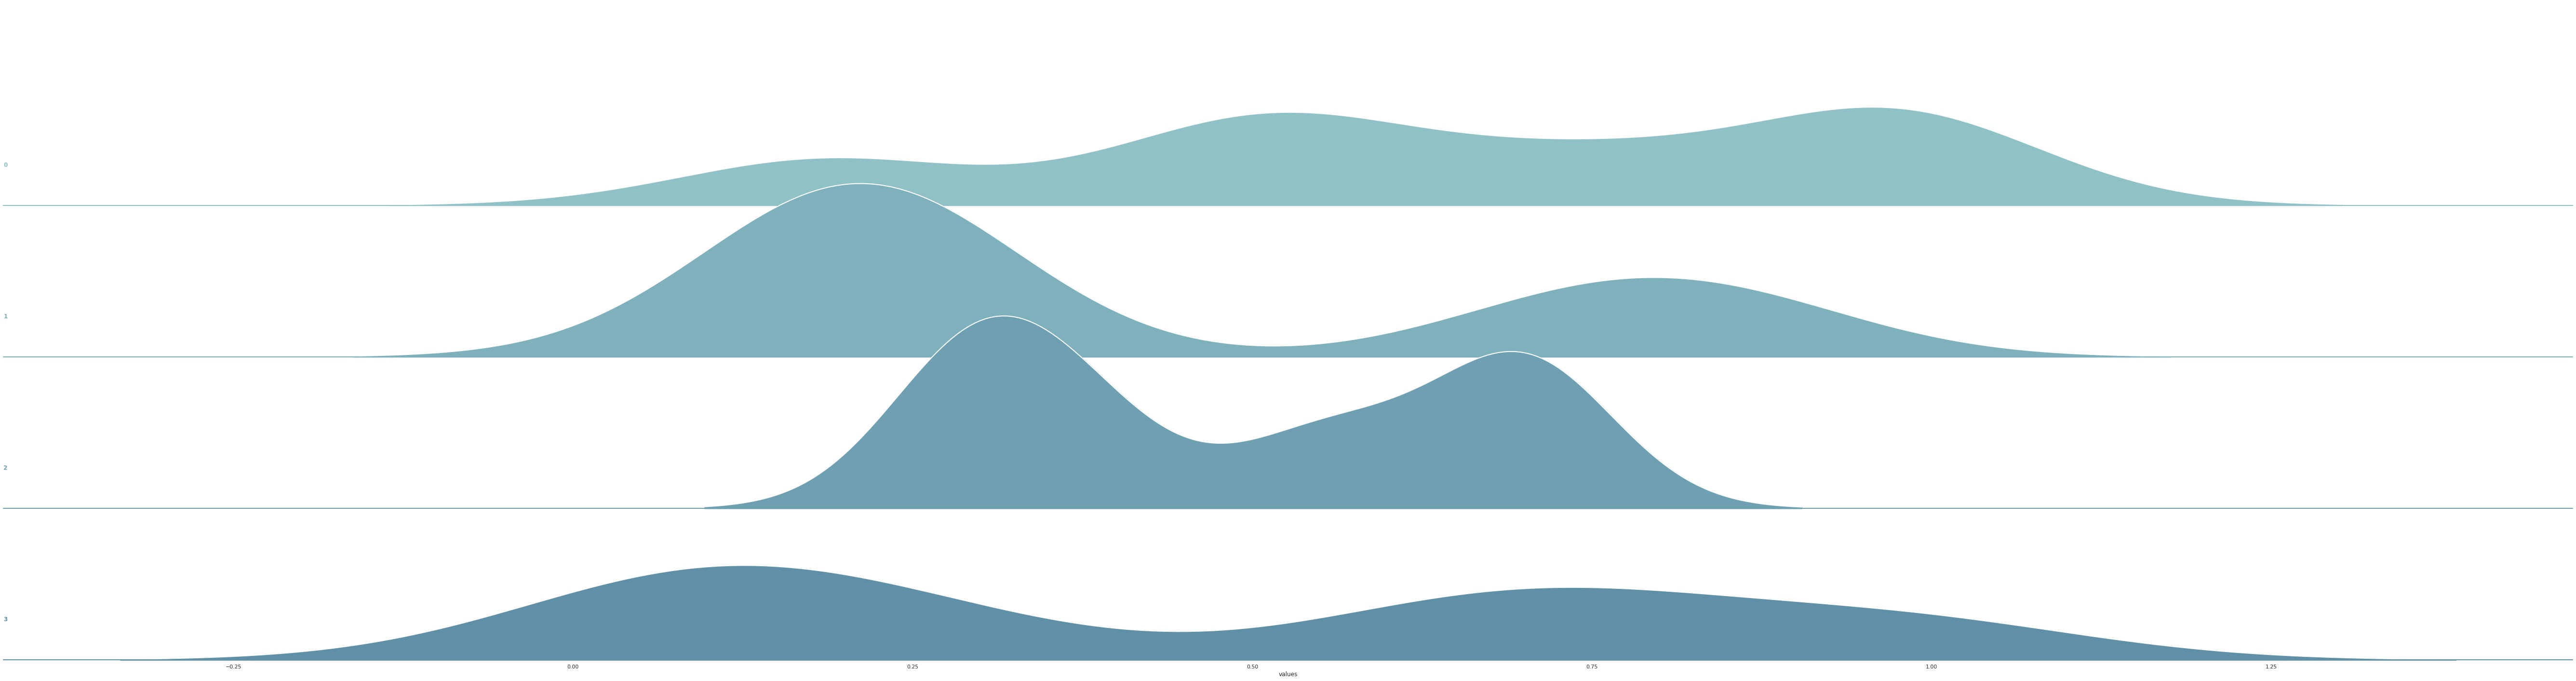

In [308]:
# looking at a specific wallet 
df2_w0 = df2[df2['wallet']==0]

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df2_w0,row="proposal", hue='proposal', aspect=15, height=5, palette=pal)

# # Draw the densities in 
g.map(sns.kdeplot, "values",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=2)
g.map(sns.kdeplot, "values", clip_on=False, color="w", lw=2, bw_adjust=.5)

# # passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "values")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

## Visualising a selected action 

In [336]:
# sub_transactions_df = transactions_df

## filter for action, wallet, proposal, epoch 
action = []

for i in range(int(72/6)): 
    
    a = list(np.zeros(6))
    
    ind = rand.choice(list(range(6)))
    
    a[ind] += 1
    
    action +=a
    
    
df2['action'] = rand.choices([0,1], weights=None, k=72)


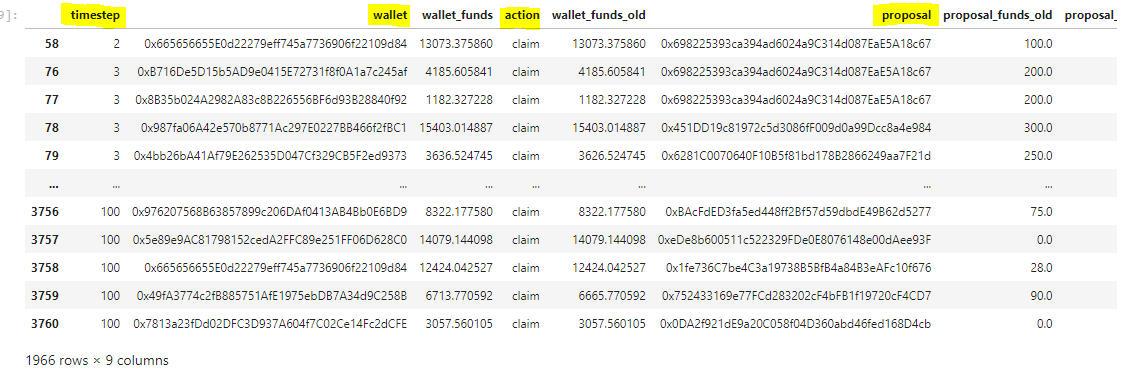

Shows cadcad-template

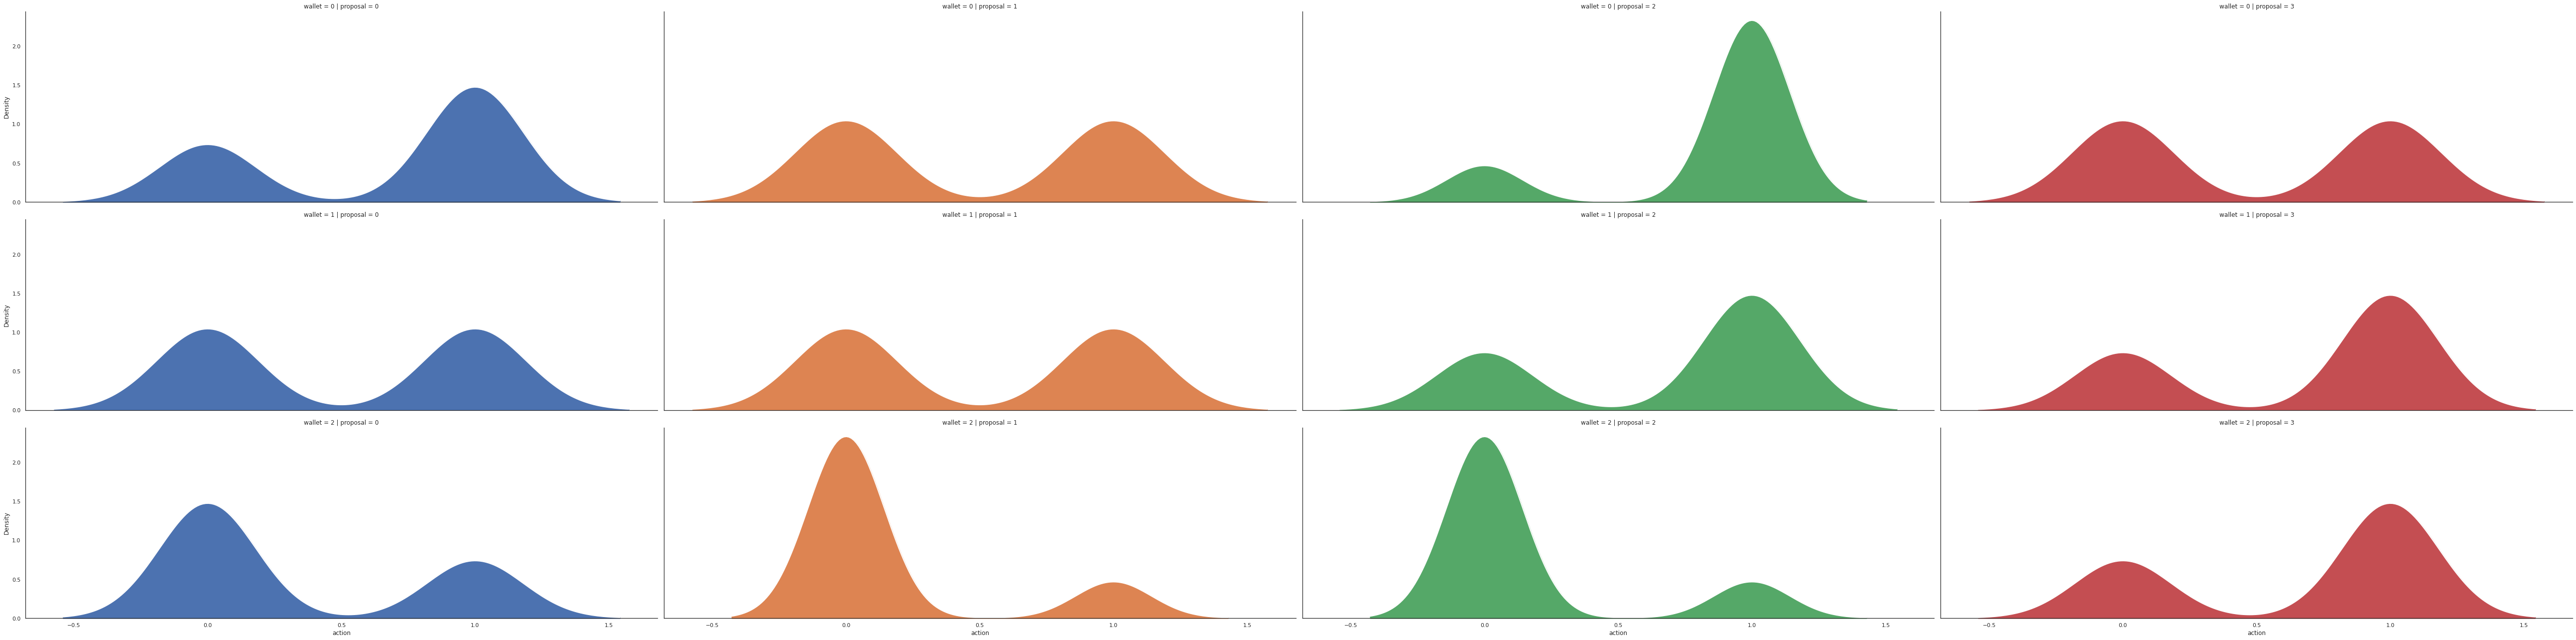

In [337]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g2 = sns.FacetGrid(df2, col='proposal',row="wallet", hue='proposal', aspect=3, height=6 )#, palette=pal)

# # Draw the densities in a few steps
g2.map(sns.kdeplot, "action",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g2.map(sns.kdeplot, "action", clip_on=False, color="w", lw=2, bw_adjust=.5)